In [1]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [255]:
dat=pd.read_csv('dengue.csv',delimiter=',')
dat = dat.dropna()
variables=dat[['humid', 'temp' , 'h10pix', 'trees' , 'Xmin', 'Ymin']]
variables=np.array(variables)
p=variables.shape[1]
n=variables.shape[0]
for i in range (p):
        prom=np.mean(variables[:,i])
        desv=np.std(variables[:,i]) 
        variables[:,i]=(variables[:,i]-prom)/desv

In [293]:
K1=15
from sklearn.cluster import KMeans
def W_met(K,variables):
    ws=[]
    ws_rand=[]
    for i in range(2,K+1):
        km= KMeans(n_clusters=i)
        pred=km.fit_predict(variables)
        w=0.0
        w_rand=0.0
        for j in range(0,i):
            variablesj=variables[pred==j]
            C=variablesj.shape[0]
            m1=variablesj.shape[0]
            n1=variablesj.shape[1]
            arr_rand=np.zeros((m1,n1))
            for l in range(n1):
                maxim=np.max(variablesj[:,l])
                minim=np.min(variablesj[:,l])
                arr_rand[:,l]=(maxim-minim)*np.random.random(variablesj.shape[0])+minim
            cont_clust=0.0
            cont_rand=0.0
            for k in range(m1):
                for m in range(m1):
                    cont_clust+=np.sum((variablesj[k]-variablesj[m])**2)
                    cont_rand+=np.sum((arr_rand[k]-arr_rand[m])**2)
            w+=0.5*cont_clust/C
            w_rand+=0.5*cont_rand/C
        ws.append(w)
        ws_rand.append(w_rand)
    ws=np.array(ws)
    ws_rand=np.array(ws_rand)
    return ws,ws_rand
                  

Text(0.5,0,'Number of clusters')

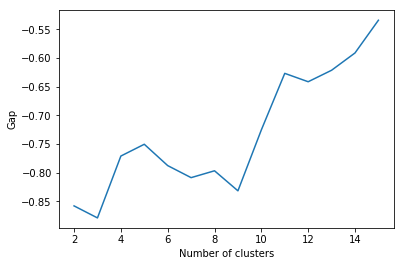

In [294]:
ws,ws_rand=W_met(K1,variables)
Ks=np.arange(2,K1+1)
loga=np.log(ws)-np.log(ws_rand)
plt.plot(Ks,loga)
plt.ylabel("Gap")
plt.xlabel("Number of clusters")

El numero optimo de clusters sería 5.

In [503]:
datos=pd.read_csv('BreadBasket_DMS.csv',delimiter=',')
datos = datos.dropna()

In [511]:
vari=datos[['Date','Time','Transaction']]
vari=np.array(vari)
pan=datos[['Item']]
pan=np.array(pan)

In [512]:
for i in range(vari.shape[0]):
    vari[i,0]=float(vari[i,0].split('-')[0])*12*31+float(vari[i,0].split('-')[1])*31+float(vari[i,0].split('-')[2])

    vari[i,1]=float(vari[i,1].split(':')[0])*3600+float(vari[i,1].split(':')[1])*60+float(vari[i,1].split(':')[2])
for i in range (vari.shape[1]):
        prom=np.mean(vari[:,i])
        desv=np.std(vari[:,i]) 
        vari[:,i]=(vari[:,i]-prom)/desv
vari=vari.astype(float)
K2=5

In [513]:
def pca(var):
    p=len(var[0,:])
    n=len(var[:,0])
    z=np.zeros((n,p))
    C=np.zeros((p,p))
    for i in range(p):
        prom1= np.mean(var[:,i])
        for j in range(p):
            prom2=np.mean(var[:,j])
            C[i,j]= np.sum(((var[:,i]-prom1)*(var[:,j]-prom2))/(n-1))
    w,v =np.linalg.eig(C)
    for i in range(p):
        for j in range(n):
            z[j,i]=np.dot(var[j,:],v[:,i])
        
    return z,v,w

In [514]:
z,v,w=pca(vari)
#z1=z[((z[:,0]>1)|(z[:,0]<-1))&((z[:,2]>1)|(z[:,2]<-1))]
w   #eigenvalues

array([  2.00690935e+00,   9.53842001e-04,   9.92277707e-01])

In [515]:
v    #eigenvectors

array([[ 0.70421185,  0.70692071,  0.06594527],
       [ 0.08767928,  0.00558122, -0.99613312],
       [ 0.70455519, -0.70727078,  0.05805194]])

De acuerdo con el PCA,el primer componente tiene el peso de la fecha y  de transacción.
Y, el segundo más importante tiene peso de hora de día y producto. 

Text(0,0.5,'Second PC')

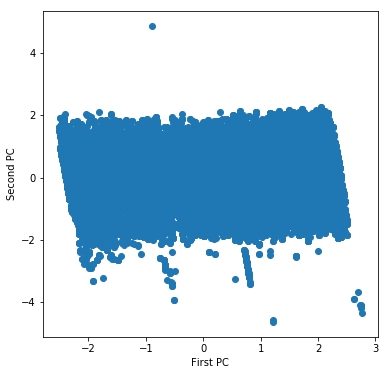

In [516]:
fig, ax = plt.subplots(figsize=((6,6)))
ax.scatter(z[:,0],z[:,2])
plt.xlabel('First PC')
plt.ylabel('Second PC')

In [502]:
km1= KMeans(n_clusters=9)
pred1=km1.fit_predict(vari)


array([8, 2, 2, ..., 5, 7, 7])

In [519]:
nombresds=pan[(z[:,0]>0)&(z[:,2]>0)]
nombresda=pan[(z[:,0]>0)&(z[:,2]<0)]
nombresis=pan[(z[:,0]<0)&(z[:,2]>0)]
nombresia=pan[(z[:,0]<0)&(z[:,2]<0)]

In [533]:
def histo(nombres):
    a=np.unique(nombres)
    cont=[]
    l=list(nombres)
    for i in range(len(a)):           
        cont.append(l.count(a[i]))   
    cont=np.array(cont)
    ord=np.sort(cont)
    mas=a[cont>30]
    nombres_mas=[]
    for i in range(len(nombres)):
        if(nombres[i] in mas):
            nombres_mas.append(nombres[i])
    h=plt.hist(nombres_mas,bins=len(mas))

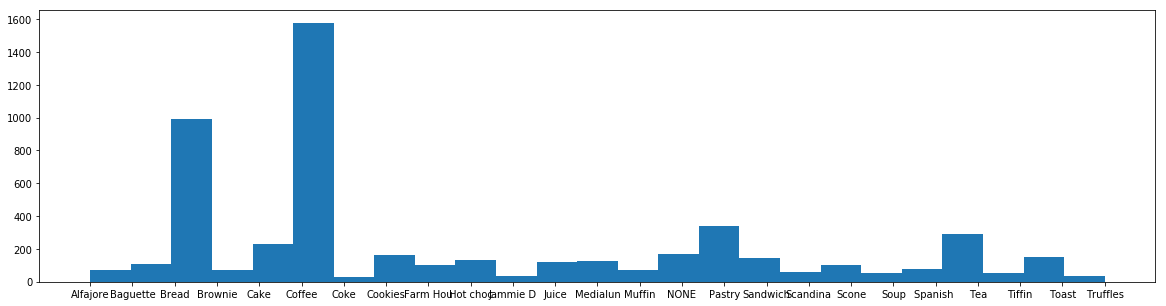

In [540]:
figura=plt.figure(figsize(20,5))
histo(nombresds)

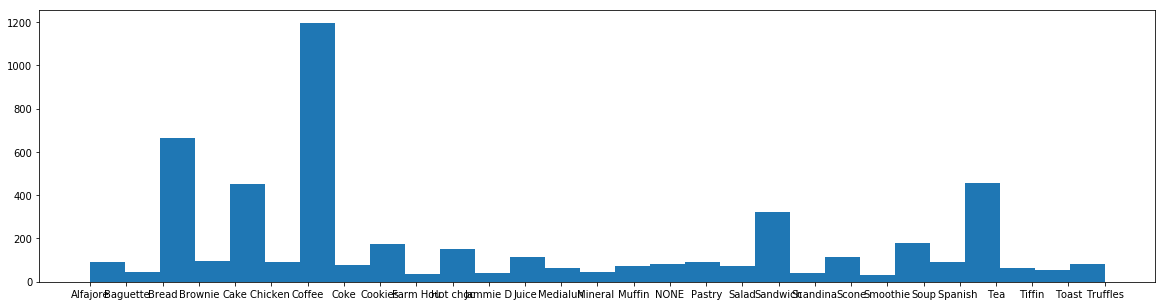

In [542]:
figura=plt.figure(figsize(20,5))
histo(nombresda)

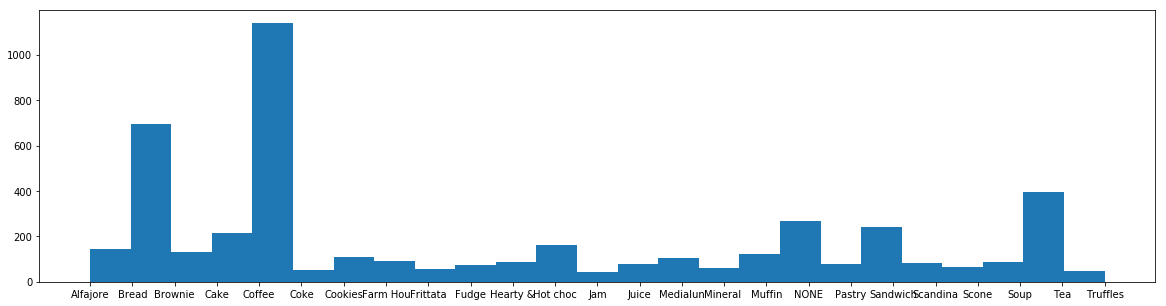

In [544]:
figura=plt.figure(figsize(20,5))
histo(nombresia)

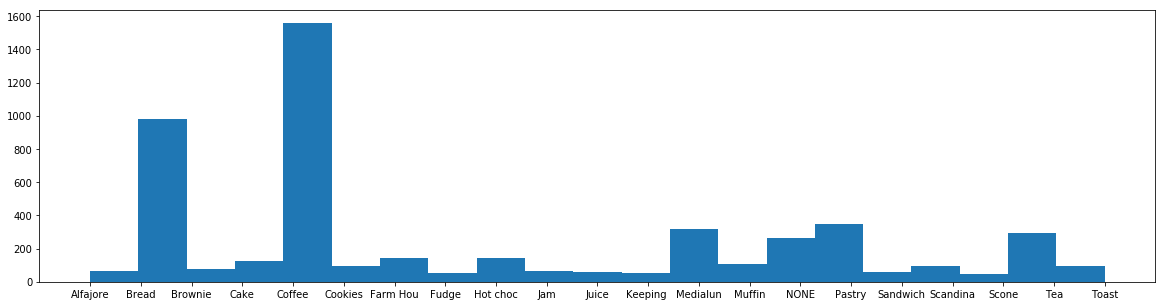

In [545]:
figura=plt.figure(figsize(20,5))
histo(nombresis)

is hace referencia a la parte superior izquierda de la grafica de las dos primeras componente.
ia hace referencia a la parte inferior izquierda de la grafica de las dos primeras componente.
da hace referencia a la parte inferior derecha de la grafica de las dos primeras componente.
ds hace referencia a la parte superior derecha de la grafica de las dos primeras componente.

Los histogramas se pueden interpretar de la siguiente forma:
Por ejemplo en ds ,se puede ver que  para fecha reciente,un gran numero de transaccione y una hora elevada del día,
se prefiere comprar  pasteleria, a parte de pan, té y café los cuales se compran bastante a 
todas horas, para todas las fechas y para todo tipo de transacciones. 

En el caso de da, para una fecha reciente, un gran numero de transacciones, pero una hora
temprana en el día, se prefiere comprar sandwich y cakes a parte de pan, té y café los cuales se compran bastante a 
todas horas, para todas las fechas y para todo tipo de transacciones. 